# LAVA Data Value
## For Mislabeled Data Detection (CIFAR-10)

In [1]:
import lava

[KeOps] Warning : CUDA libraries not found or could not be loaded; Switching to CPU only.
[KeOps] Warning : OpenMP library not found, it must be downloaded through Homebrew for apple Silicon chips
[KeOps] Warning : OpenMP support is not available. Disabling OpenMP.


In [2]:
import torch
import torchvision
# print(torch.__version__)
# print(torchvision.__version__)
# print(torch.version.cuda)
# print(torch.cuda.is_available())

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torch.autograd import Variable

import matplotlib.pyplot as plt
from torch import tensor
from torchvision import datasets, transforms
import pandas as pd
import numpy as np
from copy import deepcopy as dpcp

from torch.utils.data import Dataset, TensorDataset, DataLoader

In [3]:
! nvidia-smi

zsh:1: command not found: nvidia-smi


In [4]:
cuda_num = 0
import torchvision
print(torchvision.__version__)
import torch
print(torch.__version__)
import os
os.environ["CUDA_VISIBLE_DEVICES"]=str(cuda_num)
print(os.environ["CUDA_VISIBLE_DEVICES"])

cuda_num = 0
print("torchvision:", torchvision.__version__)
print("torch:", torch.__version__)

# Only set CUDA vars if CUDA is available
if torch.cuda.is_available():
    os.environ["CUDA_VISIBLE_DEVICES"] = str(cuda_num)
    torch.cuda.set_device(cuda_num)
    print("CUDA visible devices:", os.environ["CUDA_VISIBLE_DEVICES"])
    print("Cuda device:", torch.cuda.current_device())
    print("Cuda device count:", torch.cuda.device_count())
    device = torch.device(f'cuda:{cuda_num}')
else:
    print("CUDA not available — using CPU.")
    device = torch.device('cpu')

print("Device in use:", device)

# torch.cuda.set_device(cuda_num)
# print("Cuda device: ", torch.cuda.current_device())
# print("cude devices: ", torch.cuda.device_count())
# device = torch.device('cuda:' + str(cuda_num) if torch.cuda.is_available() else 'cpu')

0.9.0a0
1.13.1
0
torchvision: 0.9.0a0
torch: 1.13.1
CUDA not available — using CPU.
Device in use: cpu


### Set Parameters

In [5]:
training_size = 1000
valid_size = 200
resize = 32
portion = 0.25

### Loading Corrupted Data into DataLoaders
### Train and Test Loaders with Indices of Corrupted Data

In [6]:
loaders, shuffle_ind = lava.load_data_corrupted(corrupt_type='shuffle', dataname='CIFAR10', resize=resize,
                                        training_size=training_size, test_size=valid_size, currupt_por=portion)

Files already downloaded and verified
Files already downloaded and verified
CIFAR TEN


### Load Feature Extractor for a Given Dataset
### Checkpoints provided and training files provided

In [7]:
feature_extractor = lava.load_pretrained_feature_extractor('cifar10_embedder_preact_resnet18.pth', device)

### Compute Dual Solution of Optimal Transport Problem

In [8]:
dual_sol, trained_with_flag = lava.compute_dual(feature_extractor, loaders['train'], loaders['test'], 
                                                training_size, shuffle_ind, resize=resize)

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Finished first label distance in: 492.36179304122925 s.
finisehd load datasets in 0.05010700225830078s.
Calculate the same thing again...
This took 0.0008027553558349609 s.
before Loss
distance calculation takes 516.2261 seconds


### Compute the Data Values from Calibrated Gradient
### Visualize Detection Rate Based on LAVA

inspected: 10, found: 10 detection rate: 0.04 baseline: 1.8
inspected: 20, found: 20 detection rate: 0.08 baseline: 3.6
inspected: 30, found: 30 detection rate: 0.12 baseline: 5.4
inspected: 40, found: 40 detection rate: 0.16 baseline: 7.2
inspected: 50, found: 50 detection rate: 0.20 baseline: 9.0
inspected: 60, found: 60 detection rate: 0.24 baseline: 10.8
inspected: 70, found: 69 detection rate: 0.28 baseline: 12.6
inspected: 80, found: 79 detection rate: 0.32 baseline: 14.4
inspected: 90, found: 88 detection rate: 0.35 baseline: 16.2
inspected: 100, found: 98 detection rate: 0.39 baseline: 18.0
inspected: 110, found: 105 detection rate: 0.42 baseline: 19.8
inspected: 120, found: 114 detection rate: 0.46 baseline: 21.6
inspected: 130, found: 122 detection rate: 0.49 baseline: 23.400000000000002
inspected: 140, found: 130 detection rate: 0.52 baseline: 25.2
inspected: 150, found: 139 detection rate: 0.56 baseline: 27.0
inspected: 160, found: 147 detection rate: 0.59 baseline: 28.8
in

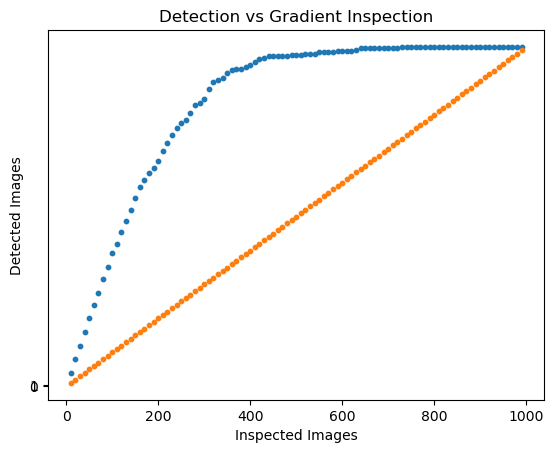

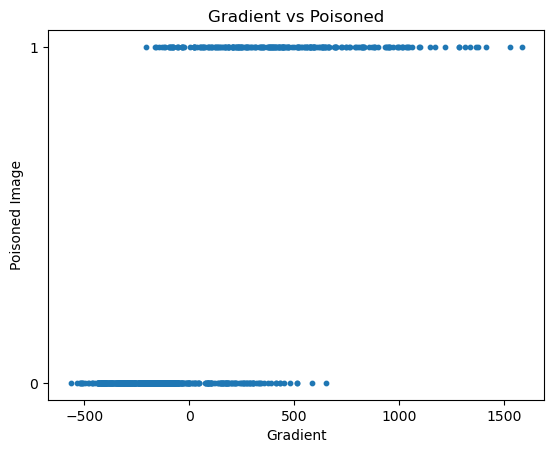

Number of poisoned images:  250  out of  1000 .
last index of poison 723


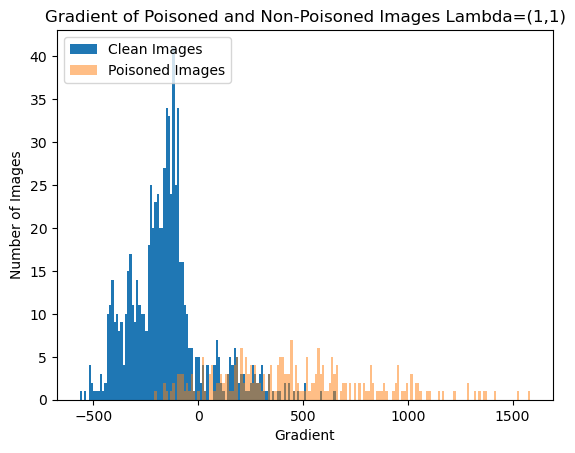

In [9]:
%matplotlib inline
calibrated_gradient = lava.compute_values_and_visualize(dual_sol, trained_with_flag, training_size, portion)

In [10]:
calibrated_gradient

[1585.4109,
 1528.968,
 1414.56,
 1378.8923,
 1367.0833,
 1339.8379,
 1315.7915,
 1285.6875,
 1284.8081,
 1218.5818,
 1173.488,
 1148.5552,
 1099.73,
 1097.0144,
 1060.7302,
 1047.0586,
 1045.0613,
 1038.0669,
 1034.7095,
 1018.3986,
 1015.1971,
 1014.3194,
 999.6761,
 997.5101,
 988.9755,
 970.0468,
 955.89655,
 954.4748,
 954.2475,
 948.627,
 943.9776,
 940.1424,
 933.7872,
 901.4467,
 884.70026,
 883.3608,
 879.3151,
 871.13055,
 855.4014,
 833.2248,
 831.8267,
 826.68475,
 826.32404,
 823.1822,
 822.7211,
 812.517,
 804.0057,
 795.42584,
 791.22943,
 767.1547,
 764.3011,
 749.99316,
 747.2518,
 726.6656,
 722.31396,
 700.4638,
 699.62897,
 696.8242,
 695.59143,
 688.1459,
 665.92096,
 665.16156,
 662.2997,
 659.6613,
 653.5793,
 653.5683,
 647.7391,
 646.20166,
 644.2564,
 639.30316,
 638.31177,
 635.1973,
 634.2419,
 631.9386,
 625.7435,
 619.9733,
 607.7699,
 597.64386,
 596.46155,
 595.8862,
 592.78827,
 590.3845,
 590.01086,
 587.23486,
 583.4775,
 579.56396,
 577.1743,
 576.66